In [127]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split

In [129]:
df = pd.read_csv("./VLagun_Total_Basins_DT.csv")

In [130]:
display(df.head())

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Acartia tonsa,Eurytemora affinis,Cyclops sp.,Nauplii Cyclopoida,Nauplii Calanoida,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Basin
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,...,0.9298,0.9251,0.0000,0.0025,0.0257,1.3152,0.8920,0.2714,0.0000,Eastern
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,...,0.0378,0.0000,0.0000,0.0000,0.0000,0.0769,0.0640,0.0464,0.0000,Eastern
2,3.721493,9.63,17.5,62.0,11.7,13.0,117.6,0.036,0.021,0.727,...,0.0000,0.0000,0.0093,0.0138,0.0006,0.0466,0.0120,0.0044,0.0000,Eastern
3,4.407982,9.54,18.4,55.0,7.4,16.2,124.7,0.023,0.024,0.566,...,0.0000,0.0129,0.0060,0.0140,0.0155,0.0313,0.0079,0.0040,0.0000,Eastern
4,4.389916,9.34,17.8,53.0,13.8,21.4,84.4,0.031,0.030,0.022,...,0.0000,0.0141,0.0000,0.0093,0.0007,0.0491,0.0143,0.0019,0.0026,Eastern


In [131]:
df.Basin = [1 if i == "Western" else 0 for i in df.Basin]

In [132]:
display(df.head())

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Acartia tonsa,Eurytemora affinis,Cyclops sp.,Nauplii Cyclopoida,Nauplii Calanoida,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Basin
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,...,0.9298,0.9251,0.0000,0.0025,0.0257,1.3152,0.8920,0.2714,0.0000,0
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,...,0.0378,0.0000,0.0000,0.0000,0.0000,0.0769,0.0640,0.0464,0.0000,0
2,3.721493,9.63,17.5,62.0,11.7,13.0,117.6,0.036,0.021,0.727,...,0.0000,0.0000,0.0093,0.0138,0.0006,0.0466,0.0120,0.0044,0.0000,0
3,4.407982,9.54,18.4,55.0,7.4,16.2,124.7,0.023,0.024,0.566,...,0.0000,0.0129,0.0060,0.0140,0.0155,0.0313,0.0079,0.0040,0.0000,0
4,4.389916,9.34,17.8,53.0,13.8,21.4,84.4,0.031,0.030,0.022,...,0.0000,0.0141,0.0000,0.0093,0.0007,0.0491,0.0143,0.0019,0.0026,0


In [133]:
X = df.drop("Basin", axis =1)
Y = df["Basin"]

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

print(f'#Training data points: {X_train.shape[0]}')
print(f'#Testing data points: {X_test.shape[0]}')
print(f'#Class: {np.unique(Y)}')

#Training data points: 108
#Testing data points: 47
#Class: [0 1]


In [135]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, min_samples_leaf=5, random_state=0)
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
Y_pred_train = tree.predict(X_train)

In [136]:
print(f'============Test============')
print(f'Missclassified samples: {(Y_test != Y_pred).sum()}')
print(f'Test dataset Accuracy (tree): {(Y_test == Y_pred).sum() / Y_test.shape[0]}')

============Test============
Missclassified samples: 13
Test dataset Accuracy (tree): 0.723404255319149


In [137]:
print(f'============Train============')
print(f'Missclassified samples: {(Y_train != Y_pred_train).sum()}')
print(f'Train dataset Accuracy (tree): {(Y_train == Y_pred_train).sum() / Y_train.shape[0]}')

============Train============
Missclassified samples: 21
Train dataset Accuracy (tree): 0.8055555555555556


In [138]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = './tree.dot', feature_names = X.columns.values)

In [139]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = "entropy", n_estimators = 200, random_state = 1, n_jobs = 2)
forest.fit(X_train, Y_train)
Y_pred = forest.predict(X_test)
Y_pred_train = forest.predict(X_train)

In [140]:
print(f'============Test============')
print(f'Missclassified samples: {(Y_test != Y_pred).sum()}')
print(f'Test dataset Accuracy (forest): {(Y_test == Y_pred).sum() / Y_test.shape[0]}')
print(f'============Train============')
print(f'Missclassified samples: {(Y_train != Y_pred_train).sum()}')
print(f'Train dataset Accuracy (forest): {(Y_train == Y_pred_train).sum() / Y_train.shape[0]}')

============Test============
Missclassified samples: 11
Test dataset Accuracy (forest): 0.7659574468085106
============Train============
Missclassified samples: 0
Train dataset Accuracy (forest): 1.0


In [141]:
import matplotlib.pyplot as plt

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
  print(f'{f"{f +1})":{"<"}{3}} {X.columns.values[indices[f]]:{"<"}{max([len(x) for x in X.columns.values])+3}} {importances[indices[f]]}')

1)  Nauplii Cyclopoida                 0.08772343300563099
2)  Cyclops sp.                        0.07205631772850435
3)  Depth                              0.06833926561605884
4)  DON                                0.05379608305733355
5)  PSU                                0.042185665143101604
6)  DOP                                0.03771431539011539
7)  O2                                 0.03606841461682495
8)  DOC                                0.03591618325000299
9)  Cyanobacteria                      0.03151065132027391
10) Acartia tonsa                      0.029090545894258583
11) TN/TP                              0.027812033927807126
12) Keratella cochlearis cochlearis    0.027800756725427797
13) temp.                              0.02730471069422631
14) SS                                 0.02648296266462954
15) PP                                 0.02410570794258376
16) SRP                                0.02387815087189549
17) PN                                 0.02374939360

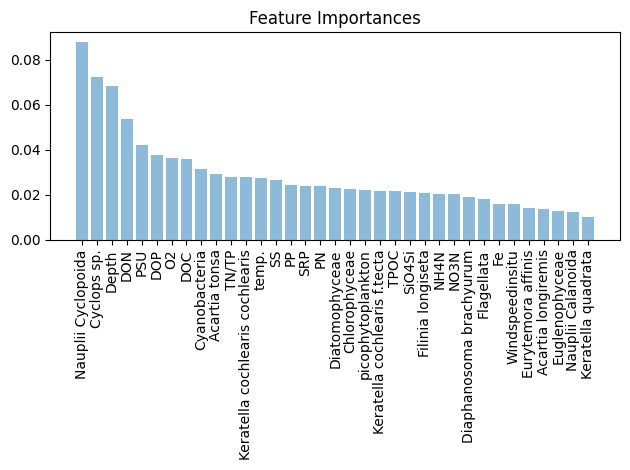

In [142]:
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center', alpha=0.5)
plt.xticks(range(X_train.shape[1]), X.columns.values[indices], rotation = 90)
plt.tight_layout()
plt.savefig("./fig-forest-feature-importances.png", dpi=300)
plt.show()

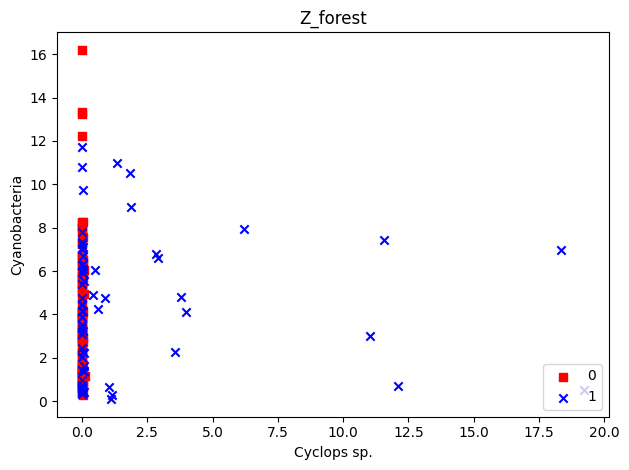

In [143]:
Z_forest = X[['Cyclops sp.', 'Cyanobacteria']].values
colors = ['r','b','g','k']
markers = ['s','x','o','^']
for l, c, m in zip(np.unique(Y.values), colors, markers):
  plt.scatter(Z_forest[Y.values==l, 0], Z_forest[Y.values==l, 1], c=c, label=l, marker=m)
plt.title("Z_forest")
plt.xlabel('Cyclops sp.')
plt.ylabel('Cyanobacteria')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("./fig-forest-z.png", dpi=300)
plt.show()

In [144]:
X_train_z, X_test_z, Y_train_z, Y_test_z = train_test_split(Z_forest,Y,test_size=0.3, random_state=0)
tree_forest = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, min_samples_leaf=5, random_state=0)
tree_forest.fit(X_train_z, Y_train_z)
Y_pred_z = tree_forest.predict(X_test_z)
Y_pred_train_z = tree_forest.predict(X_train_z)

In [145]:
print(f'============Test============')
print(f'Missclassified samples: {(Y_test_z != Y_pred_z).sum()}')
print(f'Test dataset Accuracy (tree_forest): {(Y_test_z == Y_pred_z).sum() / Y_test_z.shape[0]}')
print(f'============Train============')
print(f'Missclassified samples: {(Y_train_z != Y_pred_train_z).sum()}')
print(f'Train dataset Accuracy (tree_forest): {(Y_train_z == Y_pred_train_z).sum() / Y_train_z.shape[0]}')

============Test============
Missclassified samples: 14
Test dataset Accuracy (tree_forest): 0.7021276595744681
============Train============
Missclassified samples: 22
Train dataset Accuracy (tree_forest): 0.7962962962962963


In [146]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.075, prefit=True)
Z_forest_alt = sfm.transform(X)

for f in range(Z_forest_alt.shape[1]):
  print(f'{f"{f +1})":{"<"}{3}} {X.columns.values[indices[f]]:{"<"}{max([len(x) for x in X.columns.values])+3}} {importances[indices[f]]}')

1)  Nauplii Cyclopoida                 0.08772343300563099


In [147]:
forest_forest = RandomForestClassifier(criterion = "entropy", n_estimators = 200, random_state = 1, n_jobs = 2)
forest_forest.fit(X_train_z, Y_train_z)
Y_pred_z = forest_forest.predict(X_test_z)
Y_pred_train_z = forest_forest.predict(X_train_z)

In [148]:
print(f'============Test============')
print(f'Missclassified samples: {(Y_test_z != Y_pred_z).sum()}')
print(f'Test dataset Accuracy (forest_forest): {(Y_test_z == Y_pred_z).sum() / Y_test_z.shape[0]}')
print(f'============Train============')
print(f'Missclassified samples: {(Y_train_z != Y_pred_train_z).sum()}')
print(f'Train dataset Accuracy (forest_forest): {(Y_train_z == Y_pred_train_z).sum() / Y_train_z.shape[0]}')

============Test============
Missclassified samples: 21
Test dataset Accuracy (forest_forest): 0.5531914893617021
============Train============
Missclassified samples: 0
Train dataset Accuracy (forest_forest): 1.0


In [149]:
%matplotlib inline
from matplotlib.colors import ListedColormap

In [150]:
def plot_decision_regions(X,Y, classifier, test_idx = None, resolution = 0.02):
  colors = ['red','blue','lightgreen','gray','cyan']
  markers = ['s','x','o','^','v']
  cmap = ListedColormap(colors[:len(np.unique(Y))])

  x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
  x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),np.arange(x2_min, x2_max,resolution))

  Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(Y)):
    plt.scatter(x = X[Y==cl,0], y = X[Y==cl,1], alpha=0.8, c= [cmap(idx)], marker = markers[idx], label=cl)

  if test_idx:
    X_test, Y_test = X[test_idx, :], Y[test_idx]
    plt.scatter(X_test[:,0], X_test[:,1], c='c', alpha=1.0, linewidths=1, marker='o', s=55, label="test_set", edgecolors="k")

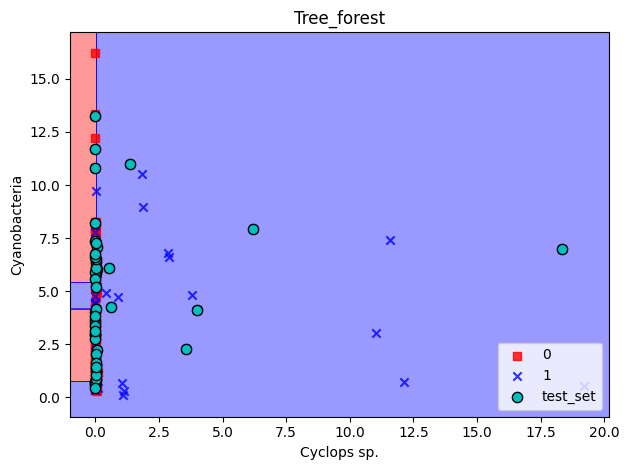

In [151]:
Z_forest_combined = np.vstack((X_train_z, X_test_z))
Y_forest_combined = np.hstack((Y_train_z, Y_test_z))
plot_decision_regions(Z_forest_combined, Y_forest_combined, classifier = tree_forest, test_idx = range(Y_train_z.shape[0], Y_train_z.shape[0]+Y_test_z.shape[0]))

plt.title("Tree_forest")
plt.xlabel("Cyclops sp.")
plt.ylabel("Cyanobacteria")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("./fig_borders-tree-forest-z.png", dpi=300)
plt.show()

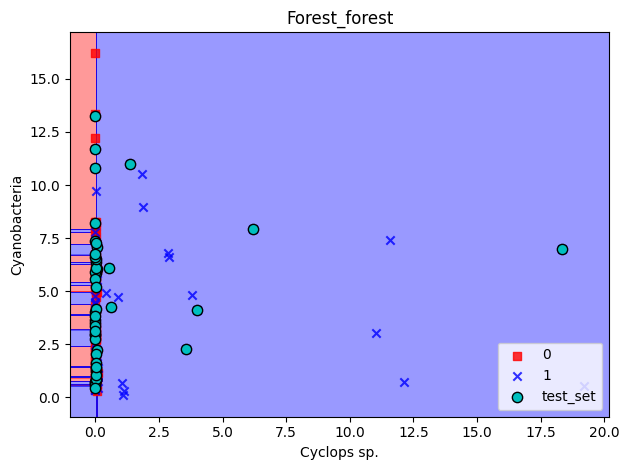

In [152]:
plot_decision_regions(Z_forest_combined, Y_forest_combined, classifier = forest_forest, test_idx = range(Y_train_z.shape[0], Y_train_z.shape[0]+Y_test_z.shape[0]))

plt.title("Forest_forest")
plt.xlabel("Cyclops sp.")
plt.ylabel("Cyanobacteria")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("./fig_borders-forest-forest-z.png", dpi=300)
plt.show()